# 자치구 별 교육 기관 데이터

In [1]:
import pandas as pd
import mysql.connector

## 어린이집

In [2]:
daycare_center = pd.read_csv('/home/lee/dev_ws/projects/project01/data/어린이집.csv', encoding='euc-kr')
daycare_center.head()

daycare_center = daycare_center.iloc[0:25]
daycare_center = daycare_center[['자치구명', '시설수합계']]
daycare_center.rename(columns={'자치구명':'자치구',
                                        '시설수합계':'계'}, inplace=True)

In [3]:
daycare_center.reset_index()

daycare_center['타입'] = '어린이집'

for idx, gu in enumerate(daycare_center['자치구']):
    if gu == '중구':
        pass
    else:
        daycare_center['자치구'][idx] = gu + '구'

/tmp/ipykernel_13624/2933128118.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  daycare_center['자치구'][idx] = gu + '구'
/tmp/ipykernel_13624/2933128118.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

### 결과 daycare_center

In [4]:
daycare_center

,자치구,계,타입
0,서대문구,126,어린이집
1,송파구,296,어린이집
2,강남구,174,어린이집
3,서초구,157,어린이집
4,관악구,158,어린이집
5,동작구,155,어린이집
6,영등포구,202,어린이집
7,금천구,109,어린이집
8,구로구,233,어린이집
9,강서구,277,어린이집


## 유치원

In [5]:
preschool = pd.read_csv('/home/lee/dev_ws/projects/project01/data/유치원.csv', header=2,encoding='utf-8')

preschool = preschool[['자치구별(2)','소계']]
preschool.rename(columns={'자치구별(2)':'자치구', '소계':'계'}, inplace=True)
preschool = preschool[preschool['자치구']!='소계']

In [6]:
preschool = preschool.set_index('자치구')
preschool = preschool.reset_index()
preschool['타입'] = '유치원'

### 결과 preschool

In [7]:
preschool.head()

,자치구,계,타입
0,종로구,16,유치원
1,중구,13,유치원
2,용산구,13,유치원
3,성동구,28,유치원
4,광진구,24,유치원


## 초등학교

In [8]:
elementary = pd.read_csv('/home/lee/dev_ws/projects/project01/data/초등학교.csv',header=3, encoding='utf-8')
elementary = elementary[['자치구별(2)','소계']]
elementary.rename(columns={'자치구별(2)':'자치구', '소계':'계'}, inplace=True)
elementary = elementary[elementary['자치구']!='소계']

elementary = elementary.set_index('자치구')
elementary = elementary.reset_index()
elementary['타입'] = '초등학교'

### 결과 elementary

In [9]:
elementary['타입'] = '초등학교'

## 중학교

In [10]:
middle = pd.read_csv('/home/lee/dev_ws/projects/project01/data/중학교_390.csv', encoding='euc-kr')

middle = middle[['도로명주소', '학교명', '설립구분']]
middle['자치구'] = [gu.split(' ')[1] for gu in middle['도로명주소']]

middle = pd.pivot_table(
    data=middle,
    columns='자치구',
    values='학교명',
    aggfunc='count'
).T.reset_index()

middle.rename(columns={'학교명':'계'},inplace=True)

middle['타입'] = '중학교'

### 결과 middle

In [11]:


middle.head()

,자치구,계,타입
0,강남구,24,중학교
1,강동구,19,중학교
2,강북구,13,중학교
3,강서구,22,중학교
4,관악구,16,중학교


## 고등학교 

In [12]:
high = pd.read_csv('/home/lee/dev_ws/projects/project01/data/고등학교_318.csv', encoding='euc-kr')

high = high[['도로명주소', '학교명', '설립구분']]
high['자치구'] = [gu.split(' ')[1] for gu in high['도로명주소']]
high = pd.pivot_table(
    data=high,
    columns='자치구',
    values='학교명',
    aggfunc='count'
).T.reset_index()

high.rename(columns={'학교명':'계'},inplace=True)

high = high.set_index('자치구')
high = high.sort_values('계')
high['타입'] = '고등학교'
high = high.reset_index()

### 결과 high

In [13]:
high.head()

,자치구,계,타입
0,금천구,6,고등학교
1,강북구,7,고등학교
2,서대문구,7,고등학교
3,동작구,7,고등학교
4,성동구,7,고등학교


## 대학교 

In [14]:
university = pd.read_excel('/home/lee/dev_ws/projects/project01/data/대학교.xlsx',header=1)

university = university[university['시도']=='서울']
university = university[['행정구', '학교수']]
university = university.drop(26)
university.rename(columns={'행정구':'자치구','학교수':'계'},inplace=True)

/home/lee/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### 결과 university

In [15]:
university.head()

,자치구,계
1,종로구,8.0
2,중구,3.0
3,용산구,3.0
4,성동구,3.0
5,광진구,4.0


## 학원과 독서실

In [16]:
academy_studyspace = pd.read_csv('/home/lee/dev_ws/projects/project01/data/학원_독서실.csv',encoding='utf-8')
academy_studyspace = academy_studyspace[['자치구별(2)','2023.1','2023.2','2023.4','2023.6','2023.20']]

academy_studyspace.rename(columns={
    '자치구별(2)':'자치구',
    '2023.1':'계',
    '2023.2':'입시학원계',
    '2023.4':'예체능학원계',
    '2023.6':'입시컨설팅계',
    '2023.20':'독서실계'
},inplace=True)

academy_studyspace = academy_studyspace.drop([0,1,2,3,4])

academy_studyspace = academy_studyspace.set_index('자치구')
academy_studyspace = academy_studyspace.reset_index()

### 학원 데이터

#### 결과 test_prep_acad

In [17]:
# 입시학원
test_prep_acad = academy_studyspace[['자치구', '입시학원계']]

test_prep_acad = test_prep_acad.set_index('자치구')
test_prep_acad['입시학원계'] = test_prep_acad['입시학원계'].astype(int)
test_prep_acad = test_prep_acad.sort_values('입시학원계')

test_prep_acad.rename(columns={'입시학원계':'계'},inplace=True)

test_prep_acad['타입'] = '입시학원'


#### 예체능학원 결과 art_sport_acad

In [18]:
# 에체능학원
art_sport_acad = academy_studyspace[['자치구', '예체능학원계']]

art_sport_acad = art_sport_acad.set_index('자치구')
art_sport_acad['예체능학원계'] = art_sport_acad['예체능학원계'].astype(int)
art_sport_acad = art_sport_acad.sort_values('예체능학원계')

art_sport_acad['타입'] = '예체능학원'

art_sport_acad.rename(columns={'예체능학원계':'계'},inplace=True)

### 독서실

#### 결과 study_space

In [19]:
study_space = academy_studyspace[['자치구', '독서실계']]

study_space = study_space.set_index('자치구')
study_space['독서실계'] = study_space['독서실계'].astype(int)
study_space = study_space.sort_values('독서실계')

study_space['타입'] = '독서실'

In [20]:
study_space.rename(columns={'독서실계':'계'},inplace=True)

In [21]:
study_space

,계,타입
자치구,,
중구,675,독서실
용산구,816,독서실
종로구,1085,독서실
금천구,1109,독서실
강북구,1208,독서실
도봉구,1663,독서실
중랑구,1733,독서실
성동구,1826,독서실
은평구,1904,독서실


## 도서관

In [22]:
library = pd.read_csv('/home/lee/dev_ws/projects/project01/data/도서관.csv',header=2,encoding='utf-8')

library = library.drop('자치구별(1)',axis=1)
library = library.drop([0,26])

library.rename(columns={
    '자치구별(2)':'자치구',
    '소계':'계'
},inplace=True)

library = library.set_index('자치구')
library = library.reset_index()
library = library[['자치구','계']]

library = library.set_index('자치구')
library['계'] = library['계'].astype(int)
library = library.sort_values('계')

library['타입'] = '도서관'

#### 결과 library

## 진학율&취업

In [23]:
admit_employ = pd.read_csv('/home/lee/dev_ws/projects/project01/data/진학률.csv',header=1,encoding='utf-8')

admit_employ.rename(columns={
    '자치구별(2)':'자치구',
    '고등학교별(2)':'학교별',
    '졸업자 (명)':'졸업자',
    '진학자수 (명)':'진학자',
    '진학률 (%)':'진학률',
    '취업자 (명)':'취업자'
},inplace=True)

admit_employ = admit_employ[['자치구','학교별','졸업자','진학자','진학률','취업자']]

admit_employ = admit_employ[admit_employ['자치구']!='소계']

admit_employ = admit_employ.set_index('자치구')
admit_employ = admit_employ.reset_index()

In [24]:
admit_employ.head()

,자치구,학교별,졸업자,진학자,진학률,취업자
0,종로구,소계,3219,1870,58.1,197
1,종로구,일반고,1478,954,64.5,46
2,종로구,특수목적고,629,384,61.0,-
3,종로구,특성화고,473,176,37.2,151
4,종로구,자율고,639,356,55.7,-


In [25]:
admit_employ_sort = admit_employ[admit_employ['학교별']=='소계']
admit_employ_sort = admit_employ_sort.reset_index().drop('index',axis=1)

In [26]:
university = pd.concat([admit_employ_sort.set_index('자치구').sort_index(), university.set_index('자치구').sort_index()], axis=1)
university.head()

,학교별,졸업자,진학자,진학률,취업자,계
자치구,,,,,,
강남구,소계,6578,3331,50.6,324,3.0
강동구,소계,3906,2552,65.3,133,1.0
강북구,소계,1926,1181,61.3,83,2.0
강서구,소계,5725,3391,59.2,462,4.0
관악구,소계,3364,1964,58.4,396,3.0


### 진학률 결과 admit_rate

In [27]:
# 자치구별 진학률
admit_rate = admit_employ[['자치구','진학률','학교별','진학자']]
admit_rate = admit_rate[admit_rate['학교별']=='소계']
admit_rate = admit_rate.set_index('자치구')
admit_rate = admit_rate.reset_index()
admit_rate = admit_rate.drop('학교별', axis=1)

admit_rate = admit_rate.set_index('자치구')
admit_rate = admit_rate.sort_values('진학률')

### 취업률 결과 employ_rate

In [28]:
# 자치구별 취업률
employ_rate = admit_employ[['자치구','졸업자','취업자','학교별']]
employ_rate = employ_rate[employ_rate['학교별']=='소계']
employ_rate = employ_rate.set_index('자치구')
employ_rate = employ_rate.reset_index()
employ_rate = employ_rate.drop('학교별', axis=1)

tmp = []

for i in range(len(employ_rate)):
    tmp.append(round((int(employ_rate['취업자'][i])/int(employ_rate['졸업자'][i])*100),1))

employ_rate['취업률'] = tmp
employ_rate = employ_rate[['자치구','취업률','취업자']]

employ_rate = employ_rate.set_index('자치구')
employ_rate = employ_rate.sort_values('취업률')

## 등록인구

In [29]:
local_people = pd.read_csv('/home/lee/dev_ws/projects/project01/data/생활인구.csv', encoding='euc-kr')
local_people.head()

,기준일ID,시간대구분,자치구코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20250321,0,11110,204215.4841,4272.8710,2601.9612,5948.9072,9156.1561,8582.5206,7112.3601,...,9466.3903,7106.0121,7983.3829,7621.9486,8345.0359,7856.8276,7820.3407,6768.7274,4741.9500,13716.3225
1,20250321,0,11140,171222.5512,3565.4608,1408.5986,2761.9403,5622.3154,6765.8259,7818.4513,...,8422.3787,7975.0618,8987.9207,7170.8670,7088.0782,6316.2044,6018.4796,5353.9189,3770.3305,10030.7428
2,20250321,0,11170,239020.8708,7464.7952,3700.7938,4807.4521,7129.2086,9096.4823,10207.4774,...,10675.1025,11532.5074,13382.5106,11008.0416,10268.1808,8829.8704,8292.9035,7108.2055,5416.0888,14185.5809
3,20250321,0,11200,328017.7464,11498.2780,4798.4310,7589.9191,11823.9861,13046.0782,12287.7911,...,14397.2170,14015.2771,17041.3553,14183.0208,13324.7807,11783.3034,11774.2653,9807.8047,7468.2397,19131.2955
4,20250321,0,11215,363466.5593,11006.0565,5959.5141,9826.3310,16093.9807,16802.5238,14188.3484,...,20520.6246,16134.2829,16288.6198,13934.7487,14701.6116,12561.4862,13330.8476,10778.2052,8455.9559,19612.5705


In [30]:
local_people = local_people[local_people['기준일ID'] == 20250321]

In [31]:
local_people = local_people[['자치구코드', '총생활인구수', '남자0세부터9세생활인구수','남자10세부터14세생활인구수','남자15세부터19세생활인구수', '여자0세부터9세생활인구수','여자10세부터14세생활인구수','여자15세부터19세생활인구수']]
local_people = local_people.drop_duplicates(['자치구코드'])

In [32]:
local_people['아동'] = local_people['남자0세부터9세생활인구수'] + local_people['남자10세부터14세생활인구수'] + local_people['남자15세부터19세생활인구수']+local_people['여자0세부터9세생활인구수'] + local_people['여자10세부터14세생활인구수'] + local_people['여자15세부터19세생활인구수']

In [33]:
local_people['교육'] = local_people['남자10세부터14세생활인구수'] + local_people['남자15세부터19세생활인구수']+ local_people['여자10세부터14세생활인구수'] + local_people['여자15세부터19세생활인구수']

In [34]:
local_people = local_people[['자치구코드','총생활인구수','아동', '교육']]

In [35]:
local_people.head()

,자치구코드,총생활인구수,아동,교육
0,11110,204215.4841,25403.3963,16911.8495
1,11140,171222.5512,15794.1445,8772.0264
2,11170,239020.8708,30678.6343,16772.5149
3,11200,328017.7464,47984.6623,25381.3758
4,11215,363466.5593,54690.1208,32466.9485


In [36]:
print(local_people['자치구코드'][0])

11110


In [37]:
import mysql.connector

conn = mysql.connector.connect(
    host = 'database-1.cbwuowec22t2.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'team2',
    password = "1234",
    database = 'eda_project' 
)

cur = conn.cursor()

tmp = []

for gu_code in local_people['자치구코드']:
    cur.execute('SELECT gu_name FROM gu WHERE gu_code = %s', (gu_code,))
    gu_name = cur.fetchone()[0]

    tmp.append(gu_name)
    conn.commit()

local_people['자치구'] = tmp


In [38]:
local_people.head()

,자치구코드,총생활인구수,아동,교육,자치구
0,11110,204215.4841,25403.3963,16911.8495,종로구
1,11140,171222.5512,15794.1445,8772.0264,중구
2,11170,239020.8708,30678.6343,16772.5149,용산구
3,11200,328017.7464,47984.6623,25381.3758,성동구
4,11215,363466.5593,54690.1208,32466.9485,광진구


In [39]:
for idx,num in enumerate(local_people['총생활인구수']):
    local_people['총생활인구수'][idx] = round(num,0)

for idx,num in enumerate(local_people['아동']):
    local_people['아동'][idx] = round(num,0)

for idx,num in enumerate(local_people['교육']):
    local_people['교육'][idx] = round(num,0)

/tmp/ipykernel_13624/1772619721.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  local_people['총생활인구수'][idx] = round(num,0)
/tmp/ipykernel_13624/1772619721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [40]:
local_people

,자치구코드,총생활인구수,아동,교육,자치구
0,11110,204215.0,25403.0,16912.0,종로구
1,11140,171223.0,15794.0,8772.0,중구
2,11170,239021.0,30679.0,16773.0,용산구
3,11200,328018.0,47985.0,25381.0,성동구
4,11215,363467.0,54690.0,32467.0,광진구
5,11230,351403.0,50306.0,29926.0,동대문구
6,11260,358630.0,49668.0,25775.0,중랑구
7,11290,446463.0,80945.0,49061.0,성북구
8,11305,283188.0,38676.0,21953.0,강북구
9,11320,275609.0,41531.0,23631.0,도봉구


## 모든 데이터 합치기

In [41]:
# import mysql.connector

# conn = mysql.connector.connect(
#     host = 'database-1.cbwuowec22t2.ap-northeast-2.rds.amazonaws.com',
#     port = 3306,
#     user = 'team2',
#     password = "1234",
#     database = 'eda_project' 
# )

# cur = conn.cursor(buffered=True)

# def update_pop(gu_code,total_population, child_population):
#     # 구 ID 가져오기
#     cur.execute('SELECT gu_id FROM gu WHERE gu_code = %s', (gu_code,))
#     gu_id = cur.fetchone()[0]


#     cur.execute(
#             'UPDATE gu SET total_population = %s, child_population = %s WHERE gu_id = %s', 
#             (total_population, child_population, gu_id)
#         )
    
#     conn.commit()

In [42]:
# school

school = pd.concat([daycare_center,preschool,elementary, middle, high], ignore_index=False)

school = school.sort_values('자치구').reset_index().drop('index',axis=1)

In [43]:
school.head()

,자치구,계,타입
0,강남구,22,고등학교
1,강남구,174,어린이집
2,강남구,37,유치원
3,강남구,34,초등학교
4,강남구,24,중학교


### DB에 데이터 넣기

In [44]:
# tmp = []

# for gu_code in local_people['자치구코드']:
#     cur.execute('SELECT gu_name FROM gu WHERE gu_code = %s', (gu_code,))
#     gu_name = cur.fetchone()[0]

#     tmp.append(gu_name)
#     conn.commit()

# local_people['자치구'] = tmp

In [45]:
school.head()

,자치구,계,타입
0,강남구,22,고등학교
1,강남구,174,어린이집
2,강남구,37,유치원
3,강남구,34,초등학교
4,강남구,24,중학교


In [46]:
school = school.set_index('자치구')

In [47]:
school

,계,타입
자치구,,
강남구,22,고등학교
강남구,174,어린이집
강남구,37,유치원
강남구,34,초등학교
강남구,24,중학교
...,...,...
중랑구,10,고등학교
중랑구,164,어린이집
중랑구,24,초등학교


In [48]:
# import mysql.connector

# conn = mysql.connector.connect(
#     host = 'database-1.cbwuowec22t2.ap-northeast-2.rds.amazonaws.com',
#     port = 3306,
#     user = 'team2',
#     password = "1234",
#     database = 'eda_project' 
# )

# cur = conn.cursor(buffered=True)

# for i,gu in  enumerate(school.index):
#      # 구 ID 가져오기
#     cur.execute('SELECT gu_id FROM gu WHERE gu_name = %s', (gu,))
#     gu_id = cur.fetchone()[0]

#     input = (gu_id, int(school['계'][i]), school['타입'][i])

#     cur.execute(
#             'INSERT INTO school (gu_id, school_count, school_type) '
#             'VALUES (%s, %s, %s)', 
#             input)
    
#     conn.commit()

In [49]:
conn.close()

In [50]:
# academy

academy = pd.concat([test_prep_acad, art_sport_acad],ignore_index=False)

In [51]:
academy

,계,타입
자치구,,
중구,38,입시학원
용산구,62,입시학원
종로구,63,입시학원
금천구,110,입시학원
강북구,146,입시학원
성동구,158,입시학원
중랑구,174,입시학원
도봉구,215,입시학원
관악구,215,입시학원


In [52]:
# import mysql.connector

# conn = mysql.connector.connect(
#     host = 'database-1.cbwuowec22t2.ap-northeast-2.rds.amazonaws.com',
#     port = 3306,
#     user = 'team2',
#     password = "1234",
#     database = 'eda_project' 
# )

# cur = conn.cursor(buffered=True)

# for i,gu in  enumerate(academy.index):
#      # 구 ID 가져오기
#     cur.execute('SELECT gu_id FROM gu WHERE gu_name = %s', (gu,))
#     gu_id = cur.fetchone()[0]

#     input = (gu_id, float(academy['계'][i]), academy['타입'][i])

#     cur.execute(
#             'INSERT INTO academy (gu_id, academy_count, academy_type) '
#             'VALUES (%s, %s, %s)', 
#             input)
    
#     conn.commit()

In [53]:
conn.close()

In [54]:
academy.head()

,계,타입
자치구,,
중구,38,입시학원
용산구,62,입시학원
종로구,63,입시학원
금천구,110,입시학원
강북구,146,입시학원


In [55]:
# learning_space

learning_space = pd.concat([library, study_space],ignore_index=False)

learning_space = learning_space.sort_values(['자치구']).reset_index()

In [56]:
learning_space = learning_space.set_index('자치구')

In [57]:
# import mysql.connector

# conn = mysql.connector.connect(
#     host = 'database-1.cbwuowec22t2.ap-northeast-2.rds.amazonaws.com',
#     port = 3306,
#     user = 'team2',
#     password = "1234",
#     database = 'eda_project' 
# )

# cur = conn.cursor(buffered=True)

# for i,gu in  enumerate(school.index):
#      # 구 ID 가져오기
#     cur.execute('SELECT gu_id FROM gu WHERE gu_name = %s', (gu,))
#     gu_id = cur.fetchone()[0]

#     input = (gu_id, int(school['계'][i]), school['타입'][i])

#     cur.execute(
#             'INSERT INTO school (gu_id, school_count, school_type) '
#             'VALUES (%s, %s, %s)', 
#             input)
    
# conn.commit()

In [58]:
conn.close()

In [59]:
# import mysql.connector

# conn = mysql.connector.connect(
#     host = 'database-1.cbwuowec22t2.ap-northeast-2.rds.amazonaws.com',
#     port = 3306,
#     user = 'team2',
#     password = "1234",
#     database = 'eda_project' 
# )

# cur = conn.cursor(buffered=True)

# for i,gu in  enumerate(learning_space.index):
#      # 구 ID 가져오기
#     cur.execute('SELECT gu_id FROM gu WHERE gu_name = %s', (gu,))
#     gu_id = cur.fetchone()[0]

#     input = (gu_id, float(learning_space['계'][i]), learning_space['타입'][i])

#     cur.execute(
#             'INSERT INTO learning_space (gu_id, space_count, space_type) '
#             'VALUES (%s, %s, %s)', 
#             input)
    

#     conn.commit()

In [60]:
conn.close()

In [61]:
university.head()

,학교별,졸업자,진학자,진학률,취업자,계
자치구,,,,,,
강남구,소계,6578,3331,50.6,324,3.0
강동구,소계,3906,2552,65.3,133,1.0
강북구,소계,1926,1181,61.3,83,2.0
강서구,소계,5725,3391,59.2,462,4.0
관악구,소계,3364,1964,58.4,396,3.0


In [62]:
# import mysql.connector

# conn = mysql.connector.connect(
#     host = 'database-1.cbwuowec22t2.ap-northeast-2.rds.amazonaws.com',
#     port = 3306,
#     user = 'team2',
#     password = "1234",
#     database = 'eda_project' 
# )

# cur = conn.cursor(buffered=True)

# for gu in  university.index:
#      # 구 ID 가져오기
#     cur.execute('SELECT gu_id FROM gu WHERE gu_name = %s', (gu,))
#     gu_id = cur.fetchone()[0]

#     input = (gu_id, float(university.loc[gu]['졸업자']), float(university.loc[gu]['진학자']), float(university.loc[gu]['진학률']), float(university.loc[gu]['계']))

#     cur.execute(
#             'INSERT INTO university (gu_id, high_graduation, uni_enrollment, advancement_rate, university_count) '
#             'VALUES (%s, %s, %s, %s, %s)', 
#             input)


#     conn.commit()

In [63]:
conn.close()

## 시각화

In [64]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

<Axes: ylabel='자치구'>

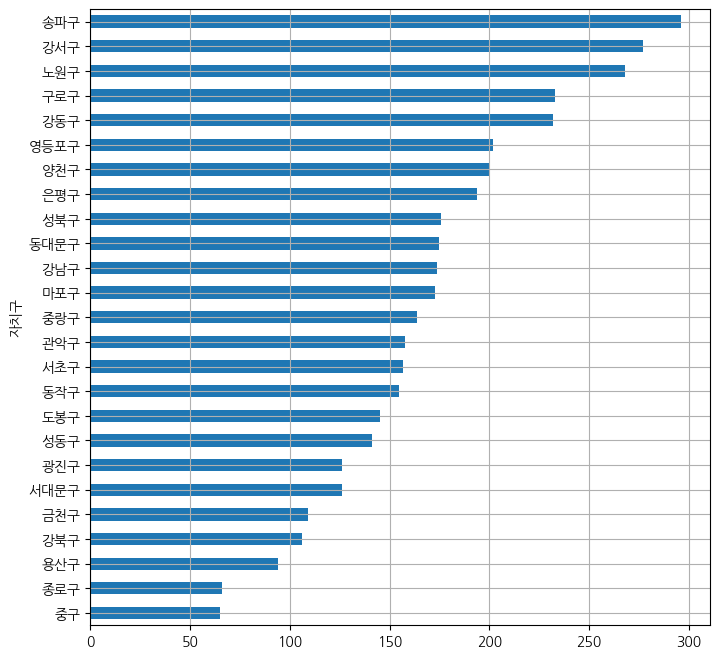

In [65]:
daycare_center_sort = daycare_center.sort_values('계').set_index('자치구')
daycare_center_sort['계'].plot(kind='barh', grid=True, figsize=(8,8))

<Axes: >

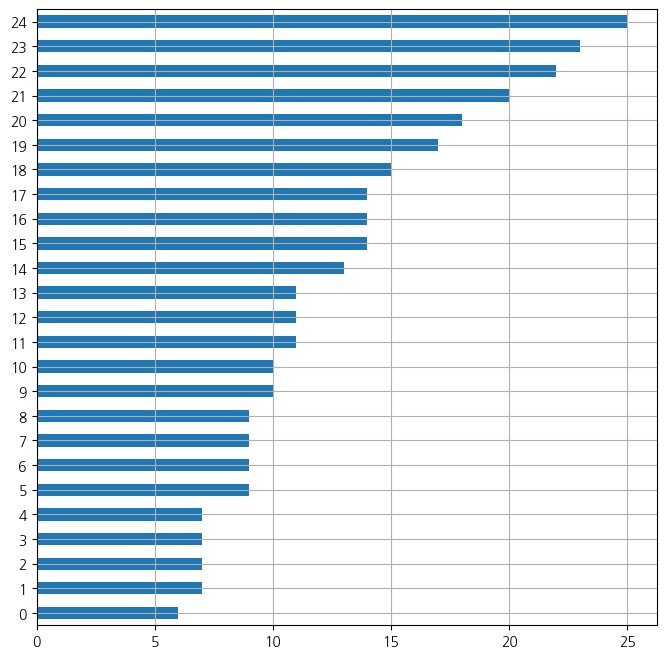

In [66]:
high['계'].plot(kind='barh', grid=True, figsize=(8,8))

* **노원구, 강서구, 강남구, 송파구, 은평구 순으로 고등학교 수가 많다**

<Axes: ylabel='자치구'>

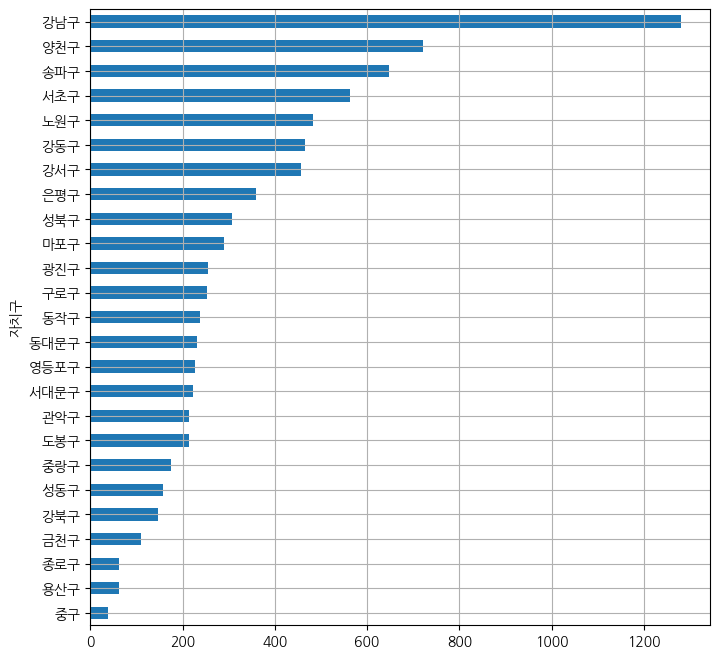

In [67]:
test_prep_acad['계'].plot(kind='barh', grid=True, figsize=(8,8))

* **강남구, 양천구, 송파구, 서초구, 노원구 순으로 입시 학원 수가 많다**

<Axes: ylabel='자치구'>

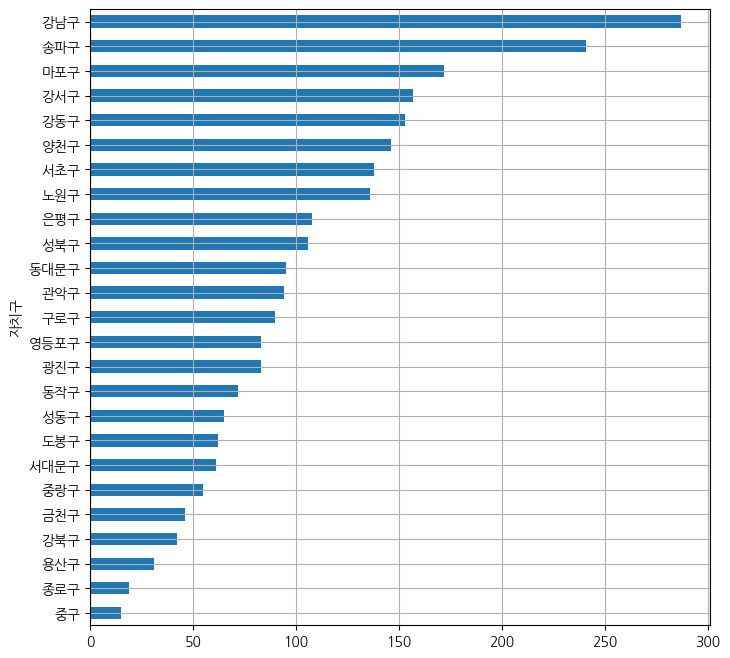

In [68]:
art_sport_acad['계'].plot(kind='barh', grid=True, figsize=(8,8))

* **강남구 송파구 마포구 강서구 강동구 순으로 예체능 학원 수가 많다**

<Axes: ylabel='자치구'>

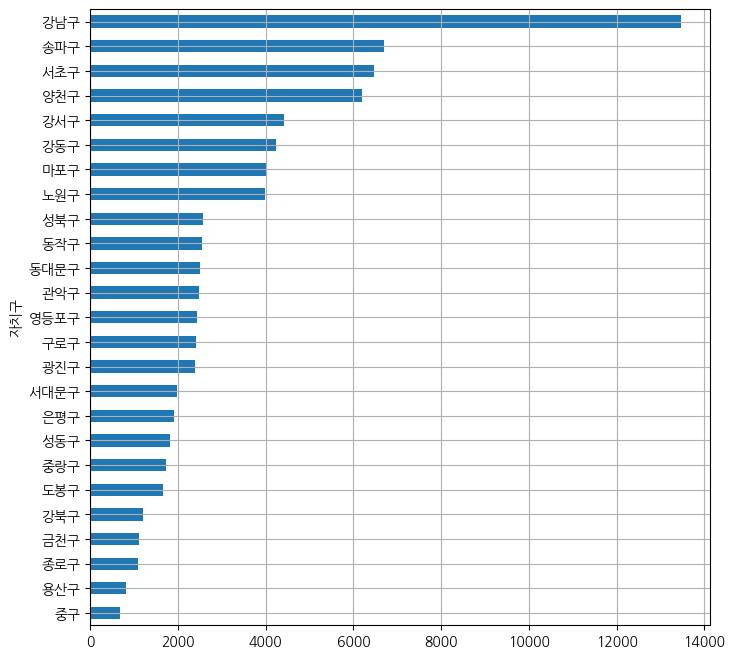

In [69]:
study_space['계'].plot(kind='barh', grid=True, figsize=(8,8))

* **강남구 송파구 서초구 양펀구 강서구 순으로 독서실 수가 많다**

<Axes: ylabel='자치구'>

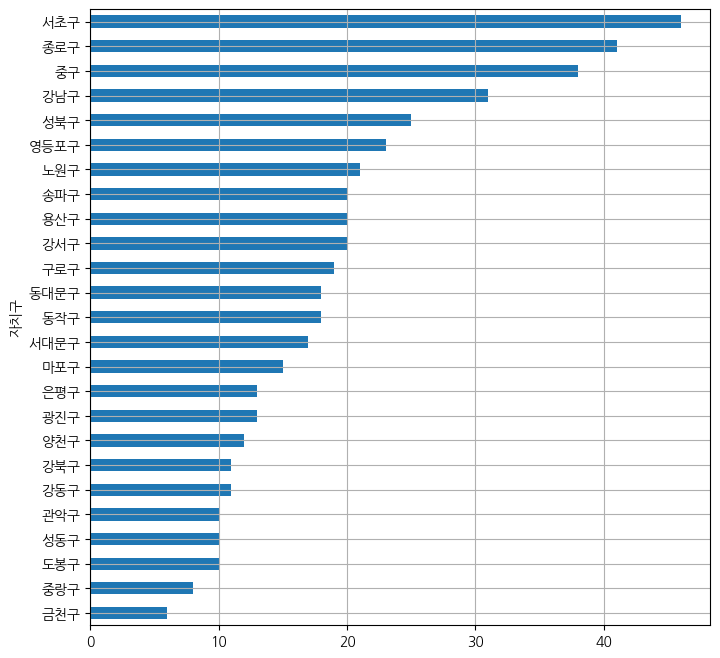

In [70]:
library['계'].plot(kind='barh', grid=True, figsize=(8,8))

* **서초구 종로구 중구 강남구 성북수 순으로 도서관 수가 많다**

<Axes: ylabel='자치구'>

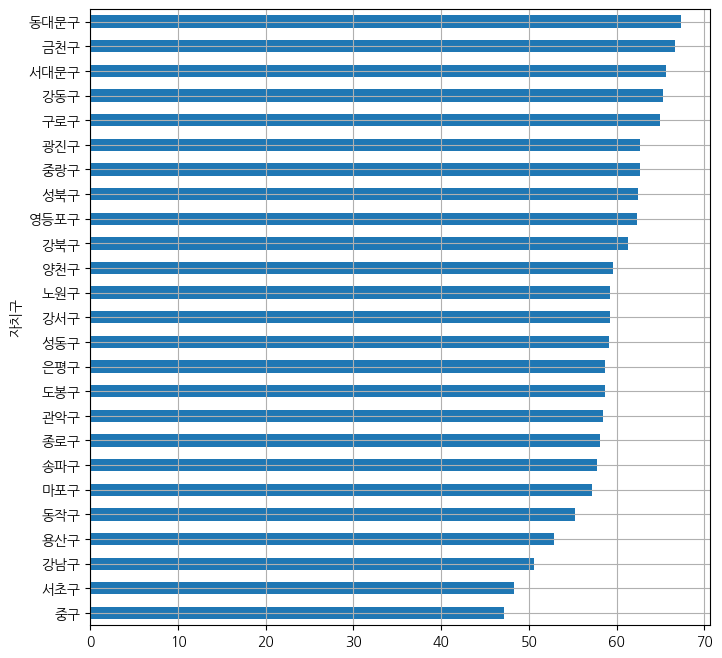

In [71]:
admit_rate['진학률'].plot(kind='barh', grid=True, figsize=(8,8))

* **진학률은 동대문구 금천구 서대문구 강동구 구로구 순으로 많지만 크게 차이가 나지는 않늗다**

<Axes: ylabel='자치구'>

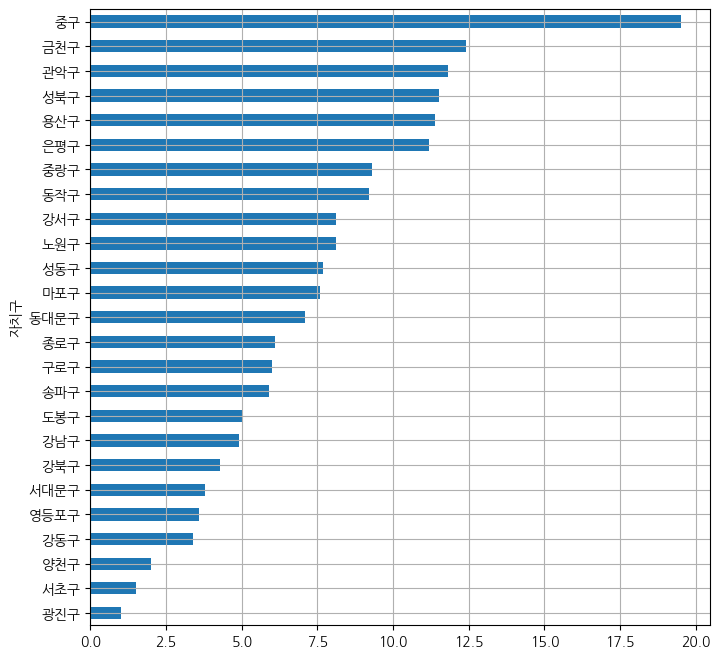

In [72]:
employ_rate['취업률'].plot(kind='barh', grid=True, figsize=(8,8))

* **진학을 하지 않고 바로 취업한 사람들은 중구 금천구 관악구 성북구 용산구 순으로 많다**

In [73]:
high_sort = high.sort_values('자치구').set_index('자치구')
admit_rate_sort = admit_rate.sort_values('자치구')

In [74]:
high_sort.head()

,계,타입
자치구,,
강남구,22,고등학교
강동구,14,고등학교
강북구,7,고등학교
강서구,23,고등학교
관악구,17,고등학교


In [75]:
admit_rate_sort.head()

,진학률,진학자
자치구,,
강남구,50.6,3331
강동구,65.3,2552
강북구,61.3,1181
강서구,59.2,3391
관악구,58.4,1964


In [76]:
high_and_admit = pd.concat((high_sort, admit_rate_sort), axis=1)
high_and_admit.head()

,계,타입,진학률,진학자
자치구,,,,
강남구,22,고등학교,50.6,3331
강동구,14,고등학교,65.3,2552
강북구,7,고등학교,61.3,1181
강서구,23,고등학교,59.2,3391
관악구,17,고등학교,58.4,1964


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '금천구'),
  Text(1, 0, '강북구'),
  Text(2, 0, '서대문구'),
  Text(3, 0, '동작구'),
  Text(4, 0, '성동구'),
  Text(5, 0, '도봉구'),
  Text(6, 0, '광진구'),
  Text(7, 0, '마포구'),
  Text(8, 0, '영등포구'),
  Text(9, 0, '용산구'),
  Text(10, 0, '중랑구'),
  Text(11, 0, '서초구'),
  Text(12, 0, '중구'),
  Text(13, 0, '동대문구'),
  Text(14, 0, '성북구'),
  Text(15, 0, '강동구'),
  Text(16, 0, '구로구'),
  Text(17, 0, '종로구'),
  Text(18, 0, '양천구'),
  Text(19, 0, '관악구'),
  Text(20, 0, '은평구'),
  Text(21, 0, '송파구'),
  Text(22, 0, '강남구'),
  Text(23, 0, '강서구'),
  Text(24, 0, '노원구')])

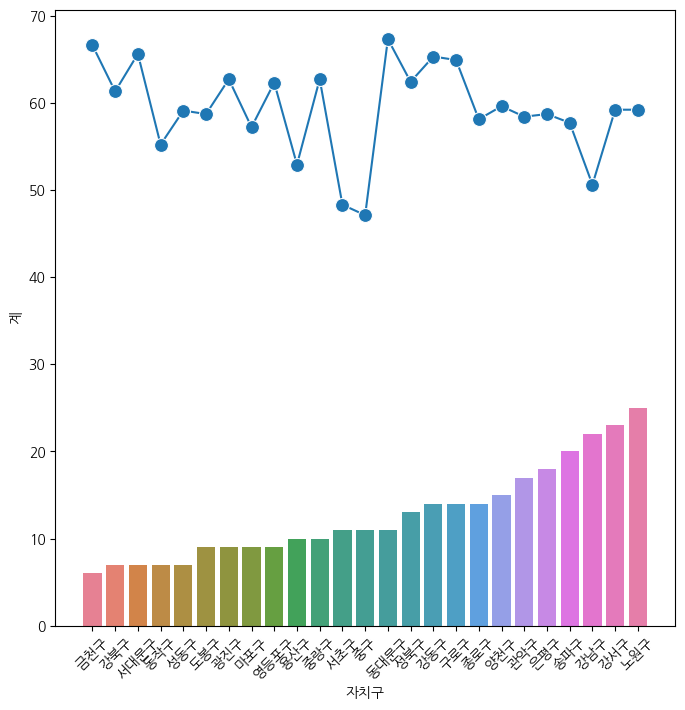

In [77]:
import seaborn as sns

high_and_admit = high_and_admit.sort_values('계')

plt.figure(figsize=(8,8))
sns.barplot(x='자치구',y='계',data=high_and_admit, hue='자치구')
sns.lineplot(x='자치구',y='진학률',data=high_and_admit, marker='o', markersize=10)
plt.xticks(rotation=45)


* **각 행정구역별 고등학교 수와 진학률을 비교해봤을 때 상관이 없어 보인다**

In [78]:
acad_sort = academy_studyspace[['자치구', '계']].sort_values('자치구').set_index('자치구')
acad_num = 0
for i in acad_sort['계']:
    acad_num+=int(i)

print(acad_num)
tmp = []

for num in acad_sort['계']:
    tmp.append(round((int(num)/acad_num*100),1))

acad_sort['비율'] = tmp
acad_sort.head()

12581


,계,비율
자치구,,
강남구,2103,16.7
강동구,677,5.4
강북구,199,1.6
강서구,676,5.4
관악구,333,2.6


In [79]:
admit_rate_sort.head()

,진학률,진학자
자치구,,
강남구,50.6,3331
강동구,65.3,2552
강북구,61.3,1181
강서구,59.2,3391
관악구,58.4,1964


In [80]:
acad_and_admit = pd.concat((acad_sort, admit_rate_sort), axis=1)
acad_and_admit

,계,비율,진학률,진학자
자치구,,,,
강남구,2103,16.7,50.6,3331
강동구,677,5.4,65.3,2552
강북구,199,1.6,61.3,1181
강서구,676,5.4,59.2,3391
관악구,333,2.6,58.4,1964
광진구,378,3.0,62.7,1690
구로구,372,3.0,64.9,2204
금천구,169,1.3,66.6,989
노원구,690,5.5,59.2,4482


In [81]:
acad_and_admit = acad_and_admit.sort_values('비율',ascending=False)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '강남구'),
  Text(1, 0, '송파구'),
  Text(2, 0, '양천구'),
  Text(3, 0, '서초구'),
  Text(4, 0, '노원구'),
  Text(5, 0, '강서구'),
  Text(6, 0, '강동구'),
  Text(7, 0, '마포구'),
  Text(8, 0, '은평구'),
  Text(9, 0, '성북구'),
  Text(10, 0, '광진구'),
  Text(11, 0, '구로구'),
  Text(12, 0, '동대문구'),
  Text(13, 0, '영등포구'),
  Text(14, 0, '동작구'),
  Text(15, 0, '관악구'),
  Text(16, 0, '서대문구'),
  Text(17, 0, '도봉구'),
  Text(18, 0, '성동구'),
  Text(19, 0, '중랑구'),
  Text(20, 0, '강북구'),
  Text(21, 0, '금천구'),
  Text(22, 0, '용산구'),
  Text(23, 0, '종로구'),
  Text(24, 0, '중구')])

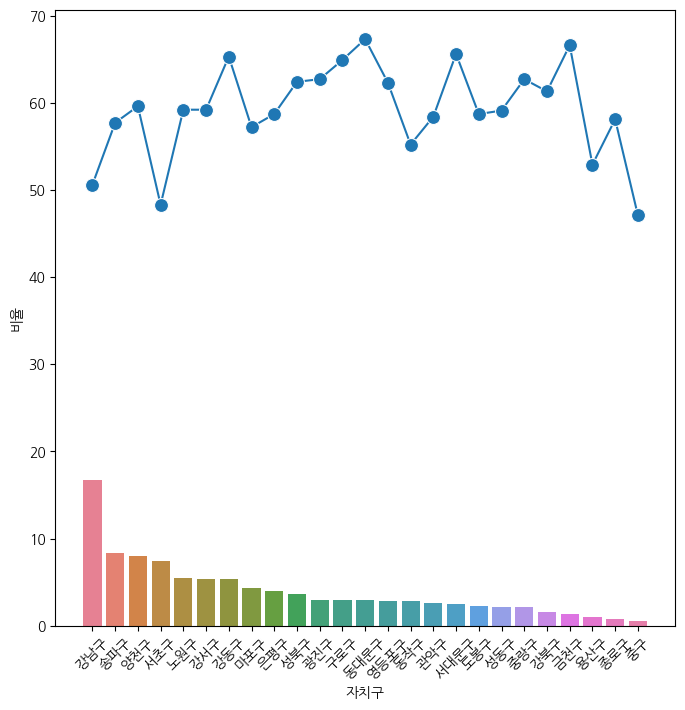

In [82]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.barplot(x='자치구',y='비율',data=acad_and_admit, hue='자치구')
sns.lineplot(x='자치구',y='진학률',data=acad_and_admit, marker='o', markersize=10)
plt.xticks(rotation=45)

### 인구 대비 학원 수 진학률 영향??


In [83]:
local_people

,자치구코드,총생활인구수,아동,교육,자치구
0,11110,204215.0,25403.0,16912.0,종로구
1,11140,171223.0,15794.0,8772.0,중구
2,11170,239021.0,30679.0,16773.0,용산구
3,11200,328018.0,47985.0,25381.0,성동구
4,11215,363467.0,54690.0,32467.0,광진구
5,11230,351403.0,50306.0,29926.0,동대문구
6,11260,358630.0,49668.0,25775.0,중랑구
7,11290,446463.0,80945.0,49061.0,성북구
8,11305,283188.0,38676.0,21953.0,강북구
9,11320,275609.0,41531.0,23631.0,도봉구


In [84]:
acad_sort = academy.sort_values('자치구')
acad_sort = pd.pivot_table(data=acad_sort,columns='자치구',values='계', aggfunc='sum').T
people_sort = local_people.set_index('자치구').sort_values('자치구')

acad_people_rate = pd.concat([acad_sort, people_sort],axis=1)
acad_people_rate

,계,자치구코드,총생활인구수,아동,교육
자치구,,,,,
강남구,1567,11680,697614.0,139489.0,83941.0
강동구,619,11740,563041.0,102962.0,56517.0
강북구,188,11305,283188.0,38676.0,21953.0
강서구,613,11500,543604.0,87797.0,44116.0
관악구,309,11620,498135.0,53002.0,31626.0
광진구,338,11215,363467.0,54690.0,32467.0
구로구,342,11530,388992.0,61454.0,30732.0
금천구,156,11545,203240.0,23745.0,12313.0
노원구,619,11350,495859.0,91638.0,57337.0


In [85]:
acad_people_rate.loc['강남구']['교육']

np.float64(83941.0)

In [86]:
rate = []

for gu in acad_people_rate.index:
    rate.append(round((acad_people_rate.loc[gu]['교육']/acad_people_rate.loc[gu]['계']),0))

acad_people_rate['학원당 학생'] = rate

In [87]:
acad_people_rate.head()

,계,자치구코드,총생활인구수,아동,교육,학원당 학생
자치구,,,,,,
강남구,1567,11680,697614.0,139489.0,83941.0,54.0
강동구,619,11740,563041.0,102962.0,56517.0,91.0
강북구,188,11305,283188.0,38676.0,21953.0,117.0
강서구,613,11500,543604.0,87797.0,44116.0,72.0
관악구,309,11620,498135.0,53002.0,31626.0,102.0


In [88]:
acad_and_admit = pd.concat([acad_people_rate, admit_rate_sort],axis=1)

In [89]:
acad_and_admit = acad_and_admit.sort_values('학원당 학생')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '강남구'),
  Text(1, 0, '양천구'),
  Text(2, 0, '마포구'),
  Text(3, 0, '강서구'),
  Text(4, 0, '서초구'),
  Text(5, 0, '송파구'),
  Text(6, 0, '금천구'),
  Text(7, 0, '영등포구'),
  Text(8, 0, '도봉구'),
  Text(9, 0, '은평구'),
  Text(10, 0, '구로구'),
  Text(11, 0, '강동구'),
  Text(12, 0, '동대문구'),
  Text(13, 0, '노원구'),
  Text(14, 0, '광진구'),
  Text(15, 0, '관악구'),
  Text(16, 0, '동작구'),
  Text(17, 0, '서대문구'),
  Text(18, 0, '중랑구'),
  Text(19, 0, '성동구'),
  Text(20, 0, '강북구'),
  Text(21, 0, '성북구'),
  Text(22, 0, '중구'),
  Text(23, 0, '용산구'),
  Text(24, 0, '종로구')])

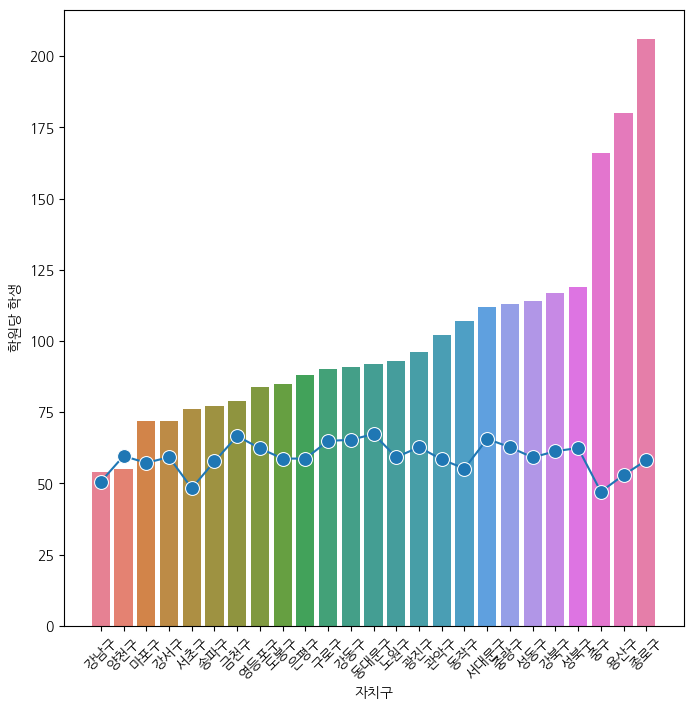

In [90]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.barplot(x='자치구',y='학원당 학생',data=acad_and_admit, hue='자치구')
sns.lineplot(x='자치구',y='진학률',data=acad_and_admit, marker='o', markersize=10)
plt.xticks(rotation=45)

In [91]:
stud_room = study_space.sort_values('자치구')
people_sort = local_people.set_index('자치구').sort_values('자치구')

stud_people_rate = pd.concat([stud_room, people_sort],axis=1)
stud_people_rate

,계,타입,자치구코드,총생활인구수,아동,교육
자치구,,,,,,
강남구,13462,독서실,11680,697614.0,139489.0,83941.0
강동구,4230,독서실,11740,563041.0,102962.0,56517.0
강북구,1208,독서실,11305,283188.0,38676.0,21953.0
강서구,4425,독서실,11500,543604.0,87797.0,44116.0
관악구,2483,독서실,11620,498135.0,53002.0,31626.0
광진구,2392,독서실,11215,363467.0,54690.0,32467.0
구로구,2414,독서실,11530,388992.0,61454.0,30732.0
금천구,1109,독서실,11545,203240.0,23745.0,12313.0
노원구,3981,독서실,11350,495859.0,91638.0,57337.0


In [92]:
rate = []

for gu in stud_people_rate.index:
    rate.append(round((stud_people_rate.loc[gu]['교육']/stud_people_rate.loc[gu]['계']),0))

stud_people_rate['독서실당 학생'] = rate

In [93]:
stud_people_rate

,계,타입,자치구코드,총생활인구수,아동,교육,독서실당 학생
자치구,,,,,,,
강남구,13462,독서실,11680,697614.0,139489.0,83941.0,6.0
강동구,4230,독서실,11740,563041.0,102962.0,56517.0,13.0
강북구,1208,독서실,11305,283188.0,38676.0,21953.0,18.0
강서구,4425,독서실,11500,543604.0,87797.0,44116.0,10.0
관악구,2483,독서실,11620,498135.0,53002.0,31626.0,13.0
광진구,2392,독서실,11215,363467.0,54690.0,32467.0,14.0
구로구,2414,독서실,11530,388992.0,61454.0,30732.0,13.0
금천구,1109,독서실,11545,203240.0,23745.0,12313.0,11.0
노원구,3981,독서실,11350,495859.0,91638.0,57337.0,14.0


In [94]:
stud_and_admit = pd.concat([stud_people_rate, admit_rate_sort],axis=1)

In [95]:
stud_and_admit.head()

,계,타입,자치구코드,총생활인구수,아동,교육,독서실당 학생,진학률,진학자
자치구,,,,,,,,,
강남구,13462,독서실,11680,697614.0,139489.0,83941.0,6.0,50.6,3331
강동구,4230,독서실,11740,563041.0,102962.0,56517.0,13.0,65.3,2552
강북구,1208,독서실,11305,283188.0,38676.0,21953.0,18.0,61.3,1181
강서구,4425,독서실,11500,543604.0,87797.0,44116.0,10.0,59.2,3391
관악구,2483,독서실,11620,498135.0,53002.0,31626.0,13.0,58.4,1964


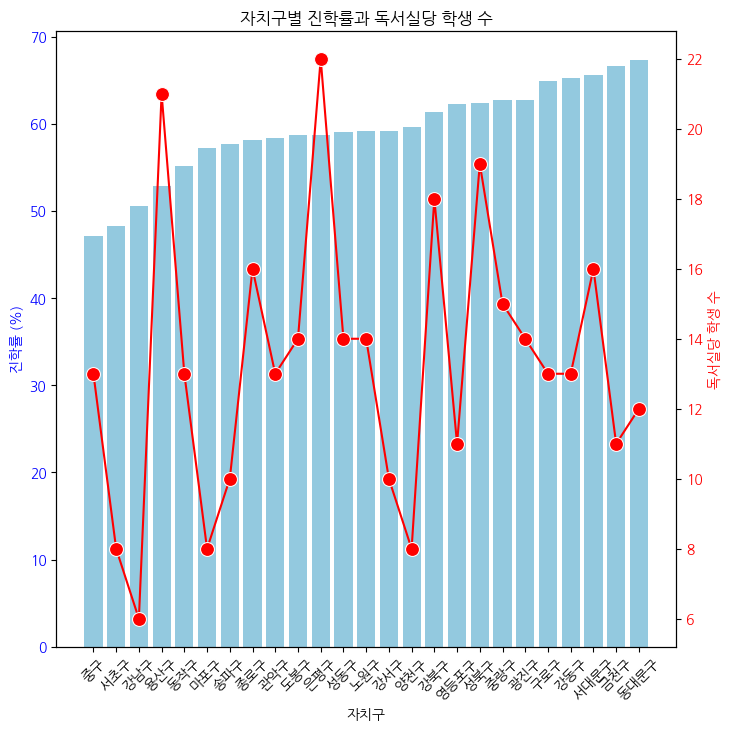

In [96]:
# 데이터 정렬
stud_and_admit = stud_and_admit.sort_values('진학률')

# Figure 생성
fig, ax1 = plt.subplots(figsize=(8, 8))

# 첫 번째 y축 (barplot, 왼쪽)
sns.barplot(x=stud_and_admit.index, y='진학률', data=stud_and_admit, ax=ax1, color='skyblue')
ax1.set_ylabel("진학률 (%)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (lineplot, 오른쪽)
ax2 = ax1.twinx()
sns.lineplot(x=stud_and_admit.index, y='독서실당 학생', data=stud_and_admit, ax=ax2, marker='o', markersize=10, color='red')
ax2.set_ylabel("독서실당 학생 수", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# x축 설정 (회전 적용)
ax1.set_xticks(range(len(stud_and_admit.index)))  # x축 위치 설정
ax1.set_xticklabels(stud_and_admit.index, rotation=45)  # 인덱스를 라벨로 설정

plt.title("자치구별 진학률과 독서실당 학생 수")
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '중구'),
  Text(1, 0, '서초구'),
  Text(2, 0, '강남구'),
  Text(3, 0, '용산구'),
  Text(4, 0, '동작구'),
  Text(5, 0, '마포구'),
  Text(6, 0, '송파구'),
  Text(7, 0, '종로구'),
  Text(8, 0, '관악구'),
  Text(9, 0, '도봉구'),
  Text(10, 0, '은평구'),
  Text(11, 0, '성동구'),
  Text(12, 0, '노원구'),
  Text(13, 0, '강서구'),
  Text(14, 0, '양천구'),
  Text(15, 0, '강북구'),
  Text(16, 0, '영등포구'),
  Text(17, 0, '성북구'),
  Text(18, 0, '중랑구'),
  Text(19, 0, '광진구'),
  Text(20, 0, '구로구'),
  Text(21, 0, '강동구'),
  Text(22, 0, '서대문구'),
  Text(23, 0, '금천구'),
  Text(24, 0, '동대문구')])

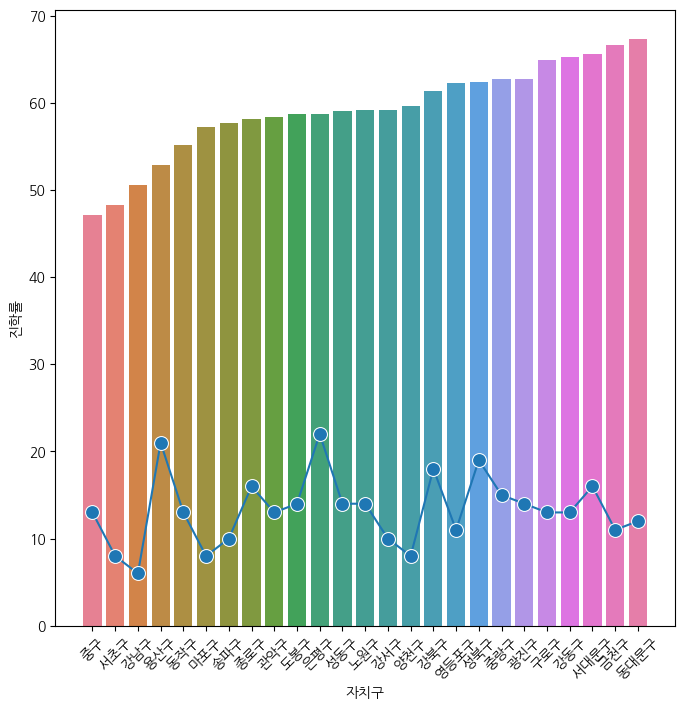

In [97]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

stud_and_admit = stud_and_admit.sort_values('진학률')

plt.figure(figsize=(8,8))
sns.barplot(x='자치구',y='진학률',data=stud_and_admit, hue='자치구')
sns.lineplot(x='자치구',y='독서실당 학생',data=stud_and_admit, marker='o', markersize=10)
plt.xticks(rotation=45)

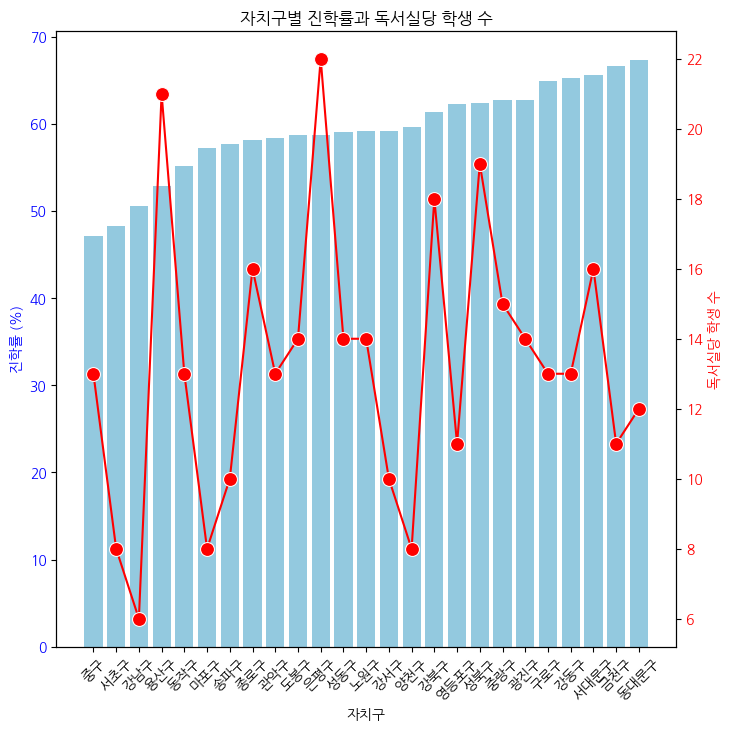

In [98]:
# 데이터 정렬
stud_and_admit = stud_and_admit.sort_values('진학률')

# Figure 생성
fig, ax1 = plt.subplots(figsize=(8, 8))

# 첫 번째 y축 (barplot, 왼쪽)
sns.barplot(x=stud_and_admit.index, y='진학률', data=stud_and_admit, ax=ax1, color='skyblue')
ax1.set_ylabel("진학률 (%)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (lineplot, 오른쪽)
ax2 = ax1.twinx()
sns.lineplot(x=stud_and_admit.index, y='독서실당 학생', data=stud_and_admit, ax=ax2, marker='o', markersize=10, color='red')
ax2.set_ylabel("독서실당 학생 수", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# x축 설정 (회전 적용)
ax1.set_xticks(range(len(stud_and_admit.index)))  # x축 위치 설정
ax1.set_xticklabels(stud_and_admit.index, rotation=45)  # 인덱스를 라벨로 설정

plt.title("자치구별 진학률과 독서실당 학생 수")
plt.show()

## 시설당 학생 수

In [99]:
people_sort = local_people.set_index('자치구').sort_index()
people_sort.head()

,자치구코드,총생활인구수,아동,교육
자치구,,,,
강남구,11680,697614.0,139489.0,83941.0
강동구,11740,563041.0,102962.0,56517.0
강북구,11305,283188.0,38676.0,21953.0
강서구,11500,543604.0,87797.0,44116.0
관악구,11620,498135.0,53002.0,31626.0


In [100]:
acad_sort.head()

,계
자치구,
강남구,1567
강동구,619
강북구,188
강서구,613
관악구,309


In [101]:
lib_sort = library.sort_index()
lib_sort.head()

,계,타입
자치구,,
강남구,31,도서관
강동구,11,도서관
강북구,11,도서관
강서구,20,도서관
관악구,10,도서관


In [102]:
space_sort = study_space.sort_index()
space_sort.head()

,계,타입
자치구,,
강남구,13462,독서실
강동구,4230,독서실
강북구,1208,독서실
강서구,4425,독서실
관악구,2483,독서실


In [103]:
youth = school[~school['타입'].isin(['어린이집', '유치원'])]
youth = pd.pivot_table(data=youth, index='자치구', values='계', aggfunc='sum')
youth_sort = youth.sort_index()
youth_sort.head()

,계
자치구,
강남구,80
강동구,62
강북구,34
강서구,80
관악구,55


In [104]:
day_sort = daycare_center.set_index('자치구').sort_index()
day_sort.head()

,계,타입
자치구,,
강남구,174,어린이집
강동구,232,어린이집
강북구,106,어린이집
강서구,277,어린이집
관악구,158,어린이집


In [105]:
pre_sort = preschool.set_index('자치구').sort_index()
pre_sort.head()

,계,타입
자치구,,
강남구,37,유치원
강동구,33,유치원
강북구,17,유치원
강서구,48,유치원
관악구,30,유치원


In [106]:
people_acad = pd.concat([people_sort,
                         acad_sort.rename(columns={'계':'학원 수'}), 
                         youth_sort.rename(columns={'계':'학교 수'}), 
                         lib_sort.rename(columns={'계':'도서관 수'}), 
                         space_sort.rename(columns={'계':'독서실 수'}),
                         day_sort.rename(columns={'계':'어린이집 수'}),
                         pre_sort.rename(columns={'계':'유치원 수'})],
                         axis=1)
people_acad.head()

,자치구코드,총생활인구수,아동,교육,학원 수,학교 수,도서관 수,타입,독서실 수,타입,어린이집 수,타입,유치원 수,타입
자치구,,,,,,,,,,,,,,
강남구,11680,697614.0,139489.0,83941.0,1567,80,31,도서관,13462,독서실,174,어린이집,37,유치원
강동구,11740,563041.0,102962.0,56517.0,619,62,11,도서관,4230,독서실,232,어린이집,33,유치원
강북구,11305,283188.0,38676.0,21953.0,188,34,11,도서관,1208,독서실,106,어린이집,17,유치원
강서구,11500,543604.0,87797.0,44116.0,613,80,20,도서관,4425,독서실,277,어린이집,48,유치원
관악구,11620,498135.0,53002.0,31626.0,309,55,10,도서관,2483,독서실,158,어린이집,30,유치원


In [107]:
tmp1 = []

for i in range(len(people_acad)):
    tmp1.append(round((int(people_acad['교육'][i])/int(people_acad['총생활인구수'][i])*100),1))

people_acad['총_교육'] = tmp1

tmp2 = []

for i in range(len(people_acad)):
    tmp2.append(round((int(people_acad['아동'][i])-int(people_acad['교육'][i])),1))

people_acad['유아'] = tmp2

tmp3 = []

for i in range(len(people_acad)):
    tmp3.append(round((int(people_acad['어린이집 수'][i])-int(people_acad['유치원 수'][i])),1))

people_acad['유아시설'] = tmp3

tmp4 = []

for i in range(len(people_acad)):
    tmp4.append(round((int(people_acad['유아'][i])/int(people_acad['총생활인구수'][i])*100),1))

people_acad['총_유아'] = tmp4

people_acad.head()

/tmp/ipykernel_13624/3102008145.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmp1.append(round((int(people_acad['교육'][i])/int(people_acad['총생활인구수'][i])*100),1))
/tmp/ipykernel_13624/3102008145.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmp2.append(round((int(people_acad['아동'][i])-int(people_acad['교육'][i])),1))
/tmp/ipykernel_13624/3102008145.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmp3.append(round((int

,자치구코드,총생활인구수,아동,교육,학원 수,학교 수,도서관 수,타입,독서실 수,타입,어린이집 수,타입,유치원 수,타입,총_교육,유아,유아시설,총_유아
자치구,,,,,,,,,,,,,,,,,,
강남구,11680,697614.0,139489.0,83941.0,1567,80,31,도서관,13462,독서실,174,어린이집,37,유치원,12.0,55548,137,8.0
강동구,11740,563041.0,102962.0,56517.0,619,62,11,도서관,4230,독서실,232,어린이집,33,유치원,10.0,46445,199,8.2
강북구,11305,283188.0,38676.0,21953.0,188,34,11,도서관,1208,독서실,106,어린이집,17,유치원,7.8,16723,89,5.9
강서구,11500,543604.0,87797.0,44116.0,613,80,20,도서관,4425,독서실,277,어린이집,48,유치원,8.1,43681,229,8.0
관악구,11620,498135.0,53002.0,31626.0,309,55,10,도서관,2483,독서실,158,어린이집,30,유치원,6.3,21376,128,4.3


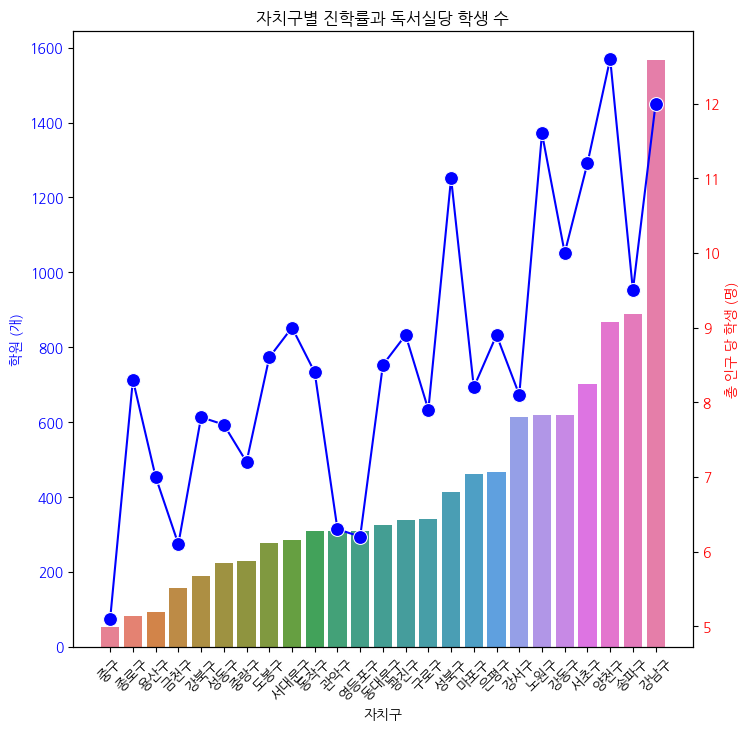

In [108]:
# 데이터 정렬
people_acad = people_acad.sort_values('학원 수')

# Figure 생성
fig, ax1 = plt.subplots(figsize=(8, 8))

# 첫 번째 y축 (barplot, 왼쪽)
sns.barplot(x=people_acad.index, y='학원 수', data=people_acad, ax=ax1, hue=people_acad.index)
ax1.set_ylabel("학원 (개)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (lineplot, 오른쪽)
ax2 = ax1.twinx()
sns.lineplot(x=people_acad.index, y='총_교육', data=people_acad, ax=ax2, marker='o', markersize=10, color='b')
ax2.set_ylabel("총 인구 당 학생 (명)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# x축 설정 (회전 적용)
ax1.set_xticks(range(len(people_acad.index)))  # x축 위치 설정
ax1.set_xticklabels(people_acad.index, rotation=45)  # 인덱스를 라벨로 설정

plt.title("자치구별 진학률과 독서실당 학생 수")
plt.show()

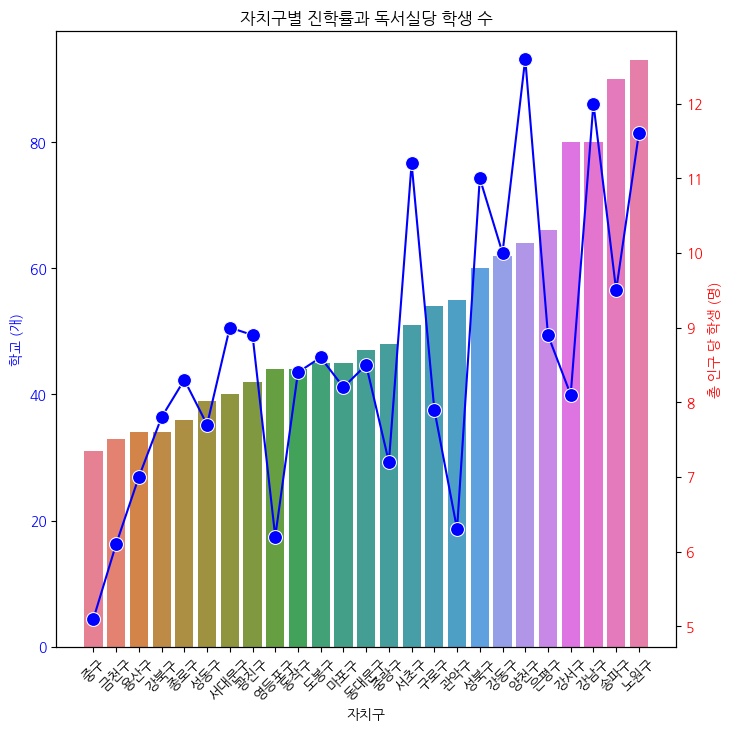

In [109]:
# 데이터 정렬
people_acad = people_acad.sort_values('학교 수')

# Figure 생성
fig, ax1 = plt.subplots(figsize=(8, 8))

# 첫 번째 y축 (barplot, 왼쪽)
sns.barplot(x=people_acad.index, y='학교 수', data=people_acad, ax=ax1, hue=people_acad.index)
ax1.set_ylabel("학교 (개)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (lineplot, 오른쪽)
ax2 = ax1.twinx()
sns.lineplot(x=people_acad.index, y='총_교육', data=people_acad, ax=ax2, marker='o', markersize=10, color='b')
ax2.set_ylabel("총 인구 당 학생 (명)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# x축 설정 (회전 적용)
ax1.set_xticks(range(len(people_acad.index)))  # x축 위치 설정
ax1.set_xticklabels(people_acad.index, rotation=45)  # 인덱스를 라벨로 설정

plt.title("자치구별 진학률과 독서실당 학생 수")
plt.show()

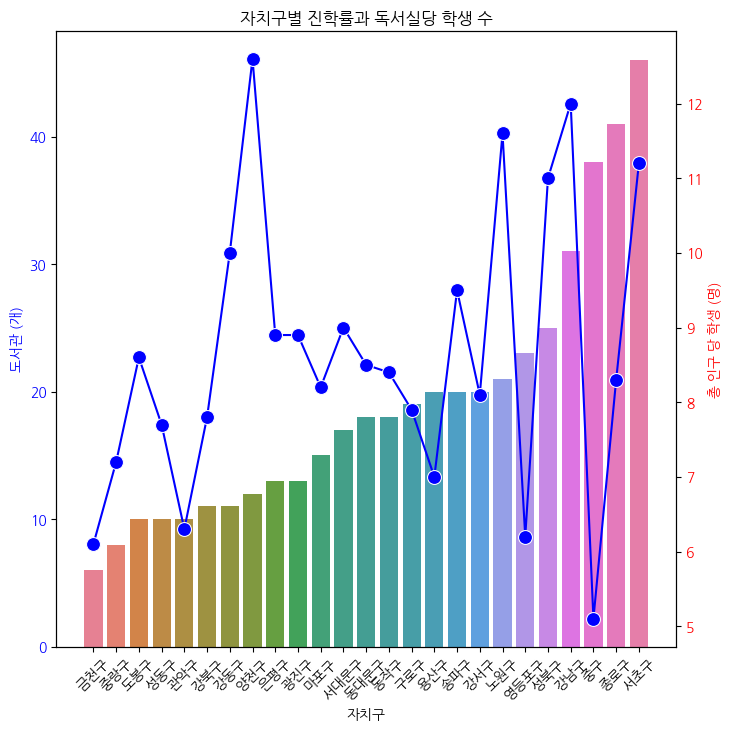

In [110]:
# 데이터 정렬
people_acad = people_acad.sort_values('도서관 수')

# Figure 생성
fig, ax1 = plt.subplots(figsize=(8, 8))

# 첫 번째 y축 (barplot, 왼쪽)
sns.barplot(x=people_acad.index, y='도서관 수', data=people_acad, ax=ax1, hue=people_acad.index)
ax1.set_ylabel("도서관 (개)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (lineplot, 오른쪽)
ax2 = ax1.twinx()
sns.lineplot(x=people_acad.index, y='총_교육', data=people_acad, ax=ax2, marker='o', markersize=10, color='b')
ax2.set_ylabel("총 인구 당 학생 (명)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# x축 설정 (회전 적용)
ax1.set_xticks(range(len(people_acad.index)))  # x축 위치 설정
ax1.set_xticklabels(people_acad.index, rotation=45)  # 인덱스를 라벨로 설정

plt.title("자치구별 진학률과 독서실당 학생 수")
plt.show()

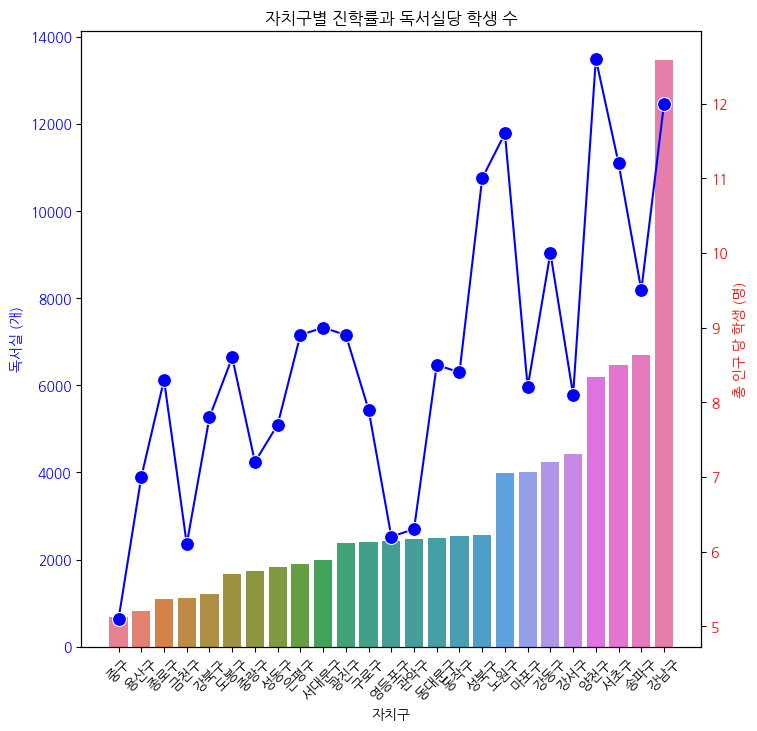

In [111]:
# 데이터 정렬
people_acad = people_acad.sort_values('독서실 수')

# Figure 생성
fig, ax1 = plt.subplots(figsize=(8, 8))

# 첫 번째 y축 (barplot, 왼쪽)
sns.barplot(x=people_acad.index, y='독서실 수', data=people_acad, ax=ax1, hue=people_acad.index)
ax1.set_ylabel("독서실 (개)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (lineplot, 오른쪽)
ax2 = ax1.twinx()
sns.lineplot(x=people_acad.index, y='총_교육', data=people_acad, ax=ax2, marker='o', markersize=10, color='b')
ax2.set_ylabel("총 인구 당 학생 (명)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# x축 설정 (회전 적용)
ax1.set_xticks(range(len(people_acad.index)))  # x축 위치 설정
ax1.set_xticklabels(people_acad.index, rotation=45)  # 인덱스를 라벨로 설정

plt.title("자치구별 진학률과 독서실당 학생 수")
plt.show()

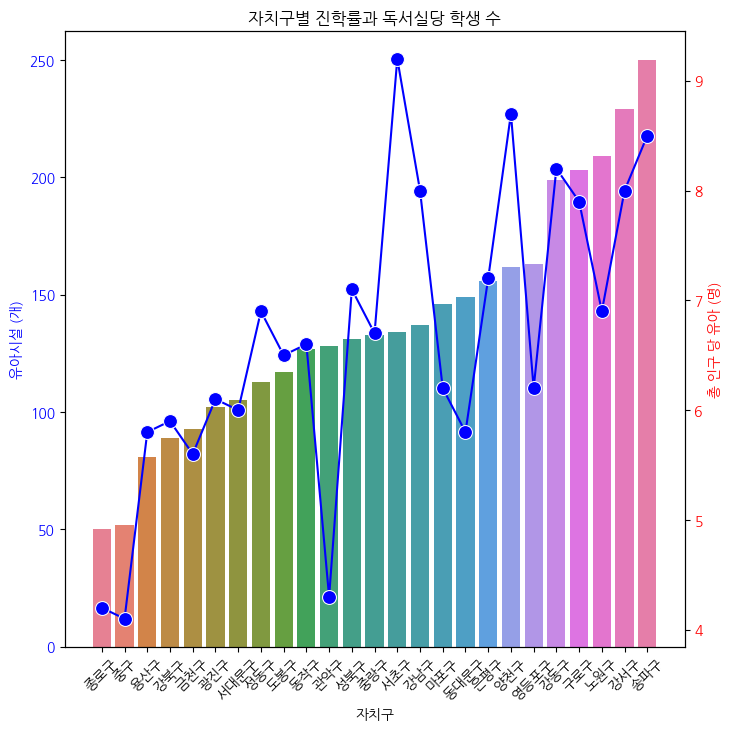

In [112]:
# 데이터 정렬
people_acad = people_acad.sort_values('유아시설')

# Figure 생성
fig, ax1 = plt.subplots(figsize=(8, 8))

# 첫 번째 y축 (barplot, 왼쪽)
sns.barplot(x=people_acad.index, y='유아시설', data=people_acad, ax=ax1, hue=people_acad.index)
ax1.set_ylabel("유아시설 (개)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (lineplot, 오른쪽)
ax2 = ax1.twinx()
sns.lineplot(x=people_acad.index, y='총_유아', data=people_acad, ax=ax2, marker='o', markersize=10, color='b')
ax2.set_ylabel("총 인구 당 유아 (명)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# x축 설정 (회전 적용)
ax1.set_xticks(range(len(people_acad.index)))  # x축 위치 설정
ax1.set_xticklabels(people_acad.index, rotation=45)  # 인덱스를 라벨로 설정

plt.title("자치구별 진학률과 독서실당 학생 수")
plt.show()

In [113]:
people_acad.head()

,자치구코드,총생활인구수,아동,교육,학원 수,학교 수,도서관 수,타입,독서실 수,타입,어린이집 수,타입,유치원 수,타입,총_교육,유아,유아시설,총_유아
자치구,,,,,,,,,,,,,,,,,,
종로구,11110,204215.0,25403.0,16912.0,82,36,41,도서관,1085,독서실,66,어린이집,16,유치원,8.3,8491,50,4.2
중구,11140,171223.0,15794.0,8772.0,53,31,38,도서관,675,독서실,65,어린이집,13,유치원,5.1,7022,52,4.1
용산구,11170,239021.0,30679.0,16773.0,93,34,20,도서관,816,독서실,94,어린이집,13,유치원,7.0,13906,81,5.8
강북구,11305,283188.0,38676.0,21953.0,188,34,11,도서관,1208,독서실,106,어린이집,17,유치원,7.8,16723,89,5.9
금천구,11545,203240.0,23745.0,12313.0,156,33,6,도서관,1109,독서실,109,어린이집,16,유치원,6.1,11432,93,5.6


In [114]:
people_acad.loc['종로구']['유아']

np.int64(8491)

In [115]:
child_per_facility = []

for gu in people_acad.index:
    capacity = people_acad.loc[gu]['유아'] / people_acad.loc[gu]['유아시설']
    child_per_facility.append(round(capacity,0))

people_acad['시설당 유아'] = child_per_facility

In [116]:
people_acad

,자치구코드,총생활인구수,아동,교육,학원 수,학교 수,도서관 수,타입,독서실 수,타입,어린이집 수,타입,유치원 수,타입,총_교육,유아,유아시설,총_유아,시설당 유아
자치구,,,,,,,,,,,,,,,,,,,
종로구,11110,204215.0,25403.0,16912.0,82,36,41,도서관,1085,독서실,66,어린이집,16,유치원,8.3,8491,50,4.2,170.0
중구,11140,171223.0,15794.0,8772.0,53,31,38,도서관,675,독서실,65,어린이집,13,유치원,5.1,7022,52,4.1,135.0
용산구,11170,239021.0,30679.0,16773.0,93,34,20,도서관,816,독서실,94,어린이집,13,유치원,7.0,13906,81,5.8,172.0
강북구,11305,283188.0,38676.0,21953.0,188,34,11,도서관,1208,독서실,106,어린이집,17,유치원,7.8,16723,89,5.9,188.0
금천구,11545,203240.0,23745.0,12313.0,156,33,6,도서관,1109,독서실,109,어린이집,16,유치원,6.1,11432,93,5.6,123.0
광진구,11215,363467.0,54690.0,32467.0,338,42,13,도서관,2392,독서실,126,어린이집,24,유치원,8.9,22223,102,6.1,218.0
서대문구,11410,354383.0,52935.0,31818.0,284,40,17,도서관,1986,독서실,126,어린이집,21,유치원,9.0,21117,105,6.0,201.0
성동구,11200,328018.0,47985.0,25381.0,223,39,10,도서관,1826,독서실,141,어린이집,28,유치원,7.7,22604,113,6.9,200.0
도봉구,11320,275609.0,41531.0,23631.0,277,45,10,도서관,1663,독서실,145,어린이집,28,유치원,8.6,17900,117,6.5,153.0


<Axes: ylabel='자치구'>

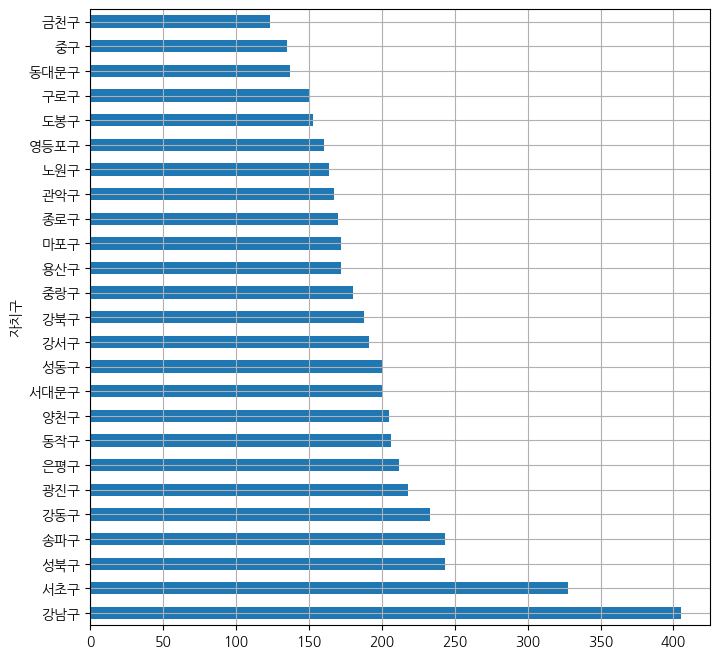

In [117]:
people_acad = people_acad.sort_values('시설당 유아',ascending=False)
people_acad['시설당 유아'].plot(kind='barh', grid=True, figsize=(8,8))

In [118]:
chlid_people_rate = []

for gu in people_acad.index:
    rate = (people_acad.loc[gu]['아동'] / people_acad.loc[gu]['총생활인구수'] )* 100
    chlid_people_rate.append(round(rate,2))

people_acad['생활인구당 아동'] = chlid_people_rate

<Axes: ylabel='자치구'>

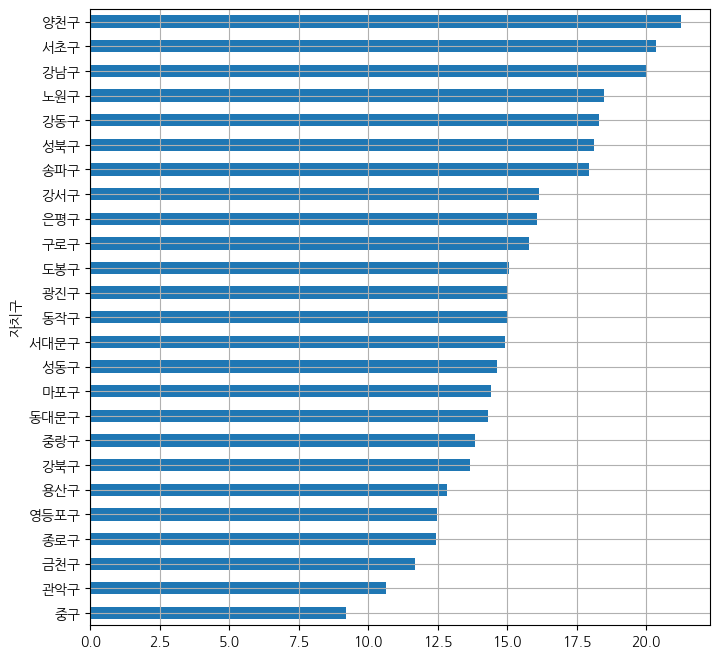

In [119]:
people_acad = people_acad.sort_values('생활인구당 아동',ascending=True)
people_acad['생활인구당 아동'].plot(kind='barh', grid=True, figsize=(8,8))

### 보육교사 당 담당하는 유아

In [120]:
educator = pd.read_csv('/home/lee/dev_ws/projects/project01/data/보육교사.csv',encoding='euc-kr')
educator

,통계연도,자치구코드,자치구명,전체수,합계_여,합계_남,원장수_여,원장수_남,보육교사수_여,보육교사수_남,...,영양사수_여,영양사수_남,조리원수_여,조리원수_남,치료사수_여,치료사수_남,기타_여,기타_남,특수교사_여,특수교사_남
0,2024,11740,강동,2733,2678,55,228,4,2049,2,...,8,0,200,1,0,0,168,47,20,1
1,2024,11710,송파,3523,3474,49,295,1,2676,20,...,11,0,225,2,0,0,243,26,11,0
2,2024,11680,강남,2428,2397,31,172,2,1798,9,...,10,0,222,0,0,0,153,19,13,1
3,2024,11650,서초,2172,2154,18,154,2,1632,7,...,13,0,167,1,0,0,163,7,16,1
4,2024,11620,관악,1683,1657,26,155,2,1221,0,...,3,0,127,1,0,0,138,22,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2014,11290,성북,2457,2363,94,329,7,1736,13,...,2,0,206,1,2,0,73,72,13,1
271,2014,11260,중랑,2311,2218,93,264,11,1652,19,...,8,0,179,2,1,0,90,61,17,0
272,2014,11230,동대문,1801,1733,68,223,9,1270,20,...,4,0,167,1,0,0,58,38,9,0
273,2014,11215,광진,1887,1804,83,220,9,1358,19,...,5,0,161,0,2,0,53,55,5,0


In [121]:
educator = educator[educator['통계연도']==2024]
educator = educator[['자치구명', '원장수_여', '원장수_남', '보육교사수_여', '보육교사수_남']]

for idx, gu in enumerate(educator['자치구명']):
    if gu == '중구':
        pass
    else:
        educator['자치구명'][idx] = gu + '구'

educator.rename(columns={'자치구명':'자치구'}, inplace=True)

# educator = pd.pivot_table(data=educator, index='자치구명', values=['원장수_여', '원장수_남', '보육교사수_여', '보육교사수_남'],aggfunc='sum')
educator.set_index('자치구')

/tmp/ipykernel_13624/1204156968.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  educator['자치구명'][idx] = gu + '구'
/tmp/ipykernel_13624/1204156968.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are se

,원장수_여,원장수_남,보육교사수_여,보육교사수_남
자치구,,,,
강동구,228,4,2049,2
송파구,295,1,2676,20
강남구,172,2,1798,9
서초구,154,2,1632,7
관악구,155,2,1221,0
동작구,154,1,1350,11
영등포구,196,5,2007,6
금천구,109,0,966,1
구로구,227,5,1785,6


In [122]:
total = []

for gu in educator.index:
    result = int(educator.loc[gu]['원장수_남'] + educator.loc[gu]['원장수_여'] + educator.loc[gu]['보육교사수_남'] + educator.loc[gu]['보육교사수_여'])
    total.append(result)

educator['계'] = total

In [123]:
educator = educator.set_index('자치구')
educator.head()

,원장수_여,원장수_남,보육교사수_여,보육교사수_남,계
자치구,,,,,
강동구,228,4,2049,2,2283
송파구,295,1,2676,20,2992
강남구,172,2,1798,9,1981
서초구,154,2,1632,7,1795
관악구,155,2,1221,0,1378


In [125]:
people_acad = pd.concat([people_acad.sort_index(), educator.sort_index()], axis=1)
people_acad.head()

,자치구코드,총생활인구수,아동,교육,학원 수,학교 수,도서관 수,타입,독서실 수,타입,...,유아,유아시설,총_유아,시설당 유아,생활인구당 아동,원장수_여,원장수_남,보육교사수_여,보육교사수_남,계
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,11680,697614.0,139489.0,83941.0,1567,80,31,도서관,13462,독서실,...,55548,137,8.0,405.0,20.00,172,2,1798,9,1981
강동구,11740,563041.0,102962.0,56517.0,619,62,11,도서관,4230,독서실,...,46445,199,8.2,233.0,18.29,228,4,2049,2,2283
강북구,11305,283188.0,38676.0,21953.0,188,34,11,도서관,1208,독서실,...,16723,89,5.9,188.0,13.66,100,5,926,4,1035
강서구,11500,543604.0,87797.0,44116.0,613,80,20,도서관,4425,독서실,...,43681,229,8.0,191.0,16.15,276,1,2266,18,2561
관악구,11620,498135.0,53002.0,31626.0,309,55,10,도서관,2483,독서실,...,21376,128,4.3,167.0,10.64,155,2,1221,0,1378


In [126]:
child_per_teacher = []

for gu in people_acad.index:
    per = (int(people_acad.loc[gu]['유아']) / int(people_acad.loc[gu]['계']) ) * 100
    child_per_teacher.append(round(per,0))

people_acad['교사당 유아'] = child_per_teacher

In [127]:
people_acad.head()

,자치구코드,총생활인구수,아동,교육,학원 수,학교 수,도서관 수,타입,독서실 수,타입,...,유아시설,총_유아,시설당 유아,생활인구당 아동,원장수_여,원장수_남,보육교사수_여,보육교사수_남,계,교사당 유아
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,11680,697614.0,139489.0,83941.0,1567,80,31,도서관,13462,독서실,...,137,8.0,405.0,20.00,172,2,1798,9,1981,2804.0
강동구,11740,563041.0,102962.0,56517.0,619,62,11,도서관,4230,독서실,...,199,8.2,233.0,18.29,228,4,2049,2,2283,2034.0
강북구,11305,283188.0,38676.0,21953.0,188,34,11,도서관,1208,독서실,...,89,5.9,188.0,13.66,100,5,926,4,1035,1616.0
강서구,11500,543604.0,87797.0,44116.0,613,80,20,도서관,4425,독서실,...,229,8.0,191.0,16.15,276,1,2266,18,2561,1706.0
관악구,11620,498135.0,53002.0,31626.0,309,55,10,도서관,2483,독서실,...,128,4.3,167.0,10.64,155,2,1221,0,1378,1551.0


<Axes: ylabel='자치구'>

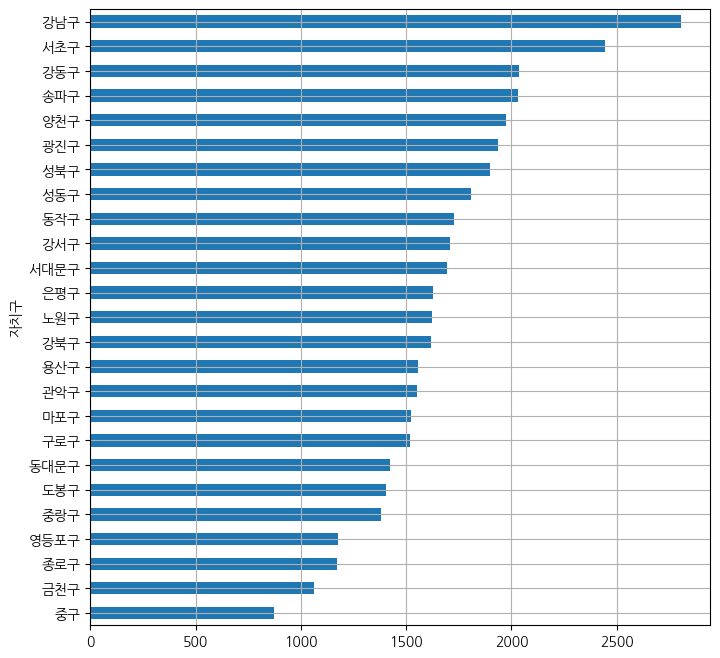

In [128]:
people_acad = people_acad.sort_values('교사당 유아',ascending=True)
people_acad['교사당 유아'].plot(kind='barh', grid=True, figsize=(8,8))